In [1]:
import numpy as np
import scipy as sp
import sys,json,os
import matplotlib.pyplot as plt
sys.path.append('../..')
import Project.profiles as pp
import Project.new_profiles as pnp
from tqdm.notebook import tqdm
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'

In [2]:
sparcd = json.load(open('../Output/sparc_new_dict.json','r'))

In [3]:
def get_cdf(dist):
    x,counts = np.unique(dist, return_counts = True)
    cumsum = np.cumsum(counts)
    cdf = cumsum/cumsum[-1]
    return x,cdf

def get_lbf(prior):
    delta_lnZ = lambda gal: sparcd[prior][gal]['core_fit']['lnZ'] - sparcd[prior][gal]['cusp_fit']['lnZ']
    lbf = [delta_lnZ(gal) for gal in sparcd[prior].keys()]
    lbf = np.array(lbf)
    lbf[lbf > 1e20] = 0
    return lbf

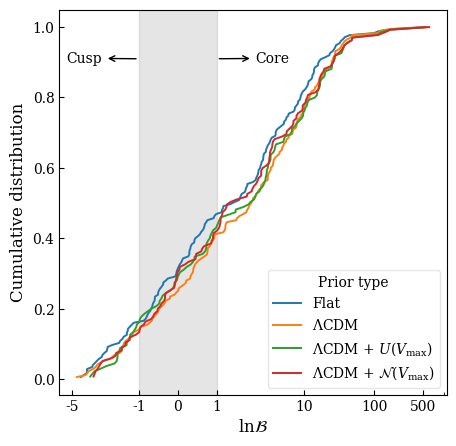

In [104]:
fig,ax = plt.subplots(1,1,figsize = (5,5))
priors = ['flat','lcdm','lcdm_reg','lcdm_vmax']
titles = ['Flat','$\Lambda$CDM','$\Lambda$CDM + $U(V_{\mathrm{max}})$','$\Lambda$CDM + $\mathcal{N}(V_{\mathrm{max}})$']
for i in range(len(priors)):
    lbf = get_lbf(priors[i])
    x,cdf = get_cdf(lbf)
    ax.plot(x,cdf,label = titles[i],lw = 1.4)
ax.set_xscale('symlog')
ax.legend(loc = 'lower right',framealpha = 0.5,title = 'Prior type')
ax.set_xticks([-5,-1,0,1,10,100,500])
ax.set_xticklabels([-5,-1,0,1,10,100,500])
ax.tick_params(which = 'both',direction = 'in')
ylim = ax.get_ylim()
ax.fill_betweenx(ylim,-1,1,color = 'grey', alpha = 0.2)
ax.set_ylim(ylim)
ax.annotate("Core", xy=(1, 0.91), xytext=(2, 0.9),arrowprops=dict(arrowstyle="<-"))
ax.annotate("Cusp", xy=(-1, 0.91), xytext=(-6, 0.9),arrowprops=dict(arrowstyle="<-"))
ax.set_xlabel('$\mathrm{ln}\mathcal{B}$',size = 12)
ax.set_ylabel('Cumulative distribution',size = 12);

plt.savefig('../Output/plots_for_report/CDF_lbf.pdf',bbox_inches = 'tight',dpi = 300)

In [ ]:
core - cusp
if + == core
if - == cusp
+ => -5 - -10 = 5 i.e, core > cusp

In [20]:
def get_errs(prior,param):
    bft = lambda gal: 'cusp_fit' if sparcd[prior][gal]['cusp_fit']['lnZ'] < sparcd[prior][gal]['core_fit']['lnZ'] else 'core_fit'
    err = [sparcd[prior][gal][bft(gal)][param][1]/sparcd[prior][gal][bft(gal)][param][0] for gal in sparcd[prior].keys()]
    return np.array(err)

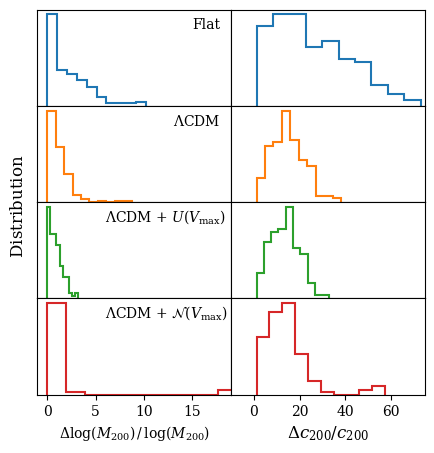

In [105]:
fig,axs = plt.subplots(4,2,figsize = (5,5), gridspec_kw = {'hspace':0,'wspace':0})
priors = ['flat','lcdm','lcdm_reg','lcdm_vmax']
labels = ['Flat', '$\Lambda$CDM', '$\Lambda$CDM + Reg', '$\Lambda$CDM + Vmax']
params = ['lm','c200']
clrs = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728']
titles = ['Flat','$\Lambda$CDM','$\Lambda$CDM + $U(V_{\mathrm{max}})$','$\Lambda$CDM + $\mathcal{N}(V_{\mathrm{max}})$']
for i in range(len(priors)):
    for j in range(len(params)):
        ax = axs[i][j]
        err = get_errs(priors[i],params[j])*100
        ax.hist(err,density = True,histtype = 'step',color = clrs[i],lw = 1.5)
        if j == 1:
            ax.set_xlim(-10,75)
            ax.set_yticks([])
            ax.set_xticks([0,20,40,60])
            ax.set_xlabel('$\Delta c_{200}/c_{200}$',size = 12)
        else:
            ax.set_xlim(-1,19)
            ax.set_yticks([])
            ax.set_xticks([0,5,10,15])
            x = 0.35 if i == 2 or i == 3 else 0.7
            x = 0.8 if i == 0 else x
            ax.text(x,0.8, titles[i], transform = ax.transAxes,color = 'k')
            ax.set_xlabel('$\Delta \mathrm{log}(M_{200})\,/\,\mathrm{log}(M_{200})$',size = 10)
axs[2][0].set_ylabel('$\;\;\;\;\;\;\;\;\;\;\;\;\;$      Distribution',size = 12)
plt.savefig('../Output/plots_for_report/distribution_of_errors.pdf',bbox_inches = 'tight',dpi = 300)

In [4]:
from Project.constants import Constants as pc

def overdenstiy(model, *params):
    ri = np.linspace(0.1,200,200)
    for ri in r:
        if model == 'nfw':
            mass_r = np.array()

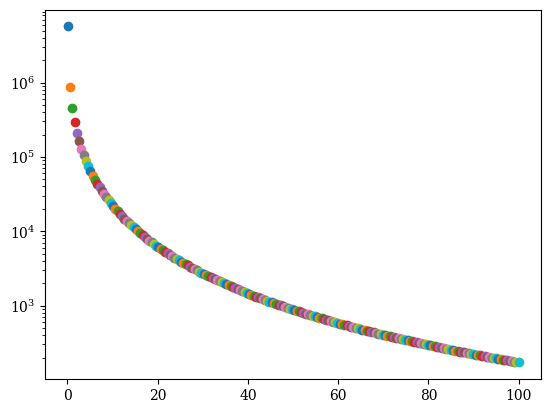

In [6]:
lm = 11.
rs = 10.
r = np.linspace(0.1,100,200)
for ri in r:
    mass_r = pp.mass_nfw(lm,rs,ri)
    mean_d = mass_r/(4.*np.pi*ri**3/3.)
    plt.scatter(ri,mean_d/pc.rho_crit)
plt.yscale('log')